In [40]:
from matplotlib import pyplot as plt
import numpy as np 
from os.path import join, abspath
from hammer import Model
from time import time
import vaex
from scipy.stats import norm
from scipy.integrate import simps
current = abspath("")
root_dir = abspath(join(current, '..', '..'))
root_data_dir = join(root_dir, "Data")
import sys
if not root_dir in sys.path: 
    sys.path.append(root_dir)

In [41]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [42]:
from utils import plot_chain, plot_corner, style, concat

style('ggplot')

In [43]:
baryon_dir = join(root_data_dir, "Baryon")
baryon_dir
# load baryons components
df_baryon = vaex.open(join(baryon_dir, "baryon.hdf5"))
df_baryon

#,components,rho,e_rho,sigma_z,e_sigma_z
0,Molecular gas (H2),0.0104,0.00312,3.7,0.2
1,Cold atomic gas (HI(1)),0.0277,0.00554,7.1,0.5
2,Warm atomic gas (HI(2)),0.0073,0.0007,22.1,2.4
3,Hot ionized gas (HII),0.0005,3e-05,39.0,4.0
4,Giant stars,0.0006,6e-05,15.5,1.6
...,...,...,...,...,...
7,4 < MV < 5,0.0029,0.00029,18.0,1.8
8,5 < MV < 8,0.0072,0.00072,18.5,1.9
9,MV > 8,0.0216,0.0028,18.5,4.0
10,White dwarfs,0.0056,0.001,20.0,5.0


In [44]:
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
rhob = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
rhoDM = 0.016
log_nu0 = 0
R = 3.4E-3
zsun = 30
w0 = -7
sigmaw1 = 5
sigmaw2 = 10
log_sigmaw = np.log(sigmaw1)
q_sigmaw = sigmaw1/sigmaw2
a1 = 1
a2 = 0.1
log_a = np.log(a1)
q_a = a2/a1
log_phi_b = 5

theta = concat(rhob, sigmaz, rhoDM, log_nu0, R, zsun, w0, log_sigmaw, q_sigmaw, log_a, q_a, log_phi_b)
theta.shape

(34,)

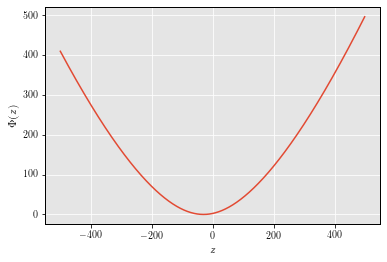

In [45]:
z_start = -500
z_end = 500
dz = 1.

z = np.arange(z_start, z_end, dz)

phi = Model.DM.potential(z, theta, dz)

plt.figure(figsize=(6, 4))
plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()


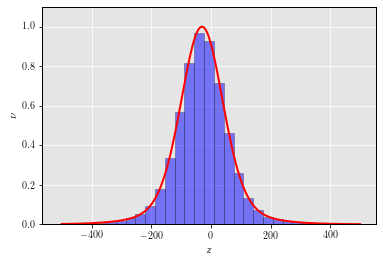

In [46]:
z = np.linspace(-500, 500, 305)
dz = z[10] - z[0]
fz = Model.DM.fz(z[::10], theta, dz)
fz_smooth = Model.DM.fz(z, theta, dz/10)
plt.figure(figsize=(6, 4))
plt.bar(z[::10], fz, width=dz, color='b', alpha=0.5, ec="k")
plt.plot(z, fz_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.ylim(0, 1.1)
plt.show()

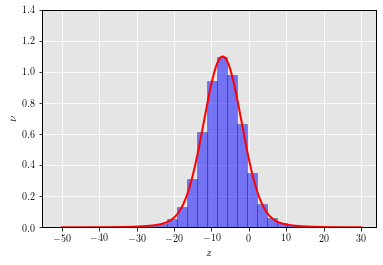

In [47]:
w = np.linspace(-50, 30, 300)
dw = w[10] - w[0]
fw = Model.DM.fw(w[::10], theta)
fw_smooth = Model.DM.fw(w, theta)
plt.figure(figsize=(6, 4))
plt.bar(w[::10], fw, width=dw, color='b', alpha=0.5, ec="k")
plt.plot(w, fw_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.ylim(0, 1.4)
plt.show()

## Sample

In [52]:
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
rhob = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
rhoDM = 0.016
log_nu0 = 0
R = 3.4E-3
zsun = 30
w0 = -7
sigmaw1 = 10
sigmaw2 = 20
log_sigmaw = np.log(sigmaw1)
q_sigmaw = sigmaw1/sigmaw2
a1 = 1
a2 = 0.1
atot = a1 + a2
a1 = a1/atot
a2 = a2/atot
log_a = np.log(a1)
q_a = a2/a1
log_phi_b = 5

theta = concat(rhob, sigmaz, rhoDM, log_nu0, R, zsun, w0, log_sigmaw, q_sigmaw, log_a, q_a, log_phi_b)

phi_b = Model.DM.potential(np.array([50.+zsun]), theta, dz)
log_phi_b = np.log(phi_b)
theta = concat(rhob, sigmaz, rhoDM, log_nu0, R, zsun, w0, log_sigmaw, q_sigmaw, log_a, q_a, log_phi_b)
theta.shape, log_phi_b

((34,), array([3.23168032]))

In [54]:
theta[:12].sum(), theta[24:]


(0.08889999999999998,
 array([ 1.60000000e-02,  0.00000000e+00,  3.40000000e-03,  3.00000000e+01,
        -7.00000000e+00,  2.30258509e+00,  5.00000000e-01, -9.53101798e-02,
         1.00000000e-01,  3.23168032e+00]))

In [24]:
N = 5000

z = np.random.randn(N)*200
w = np.random.randn(N)*15
dz = 1
pos = np.array([z, w]).T
pos.shape

(5000, 2)

In [25]:
pot = Model.DM.fzw(pos, theta, dz)
pot.shape

(5000,)

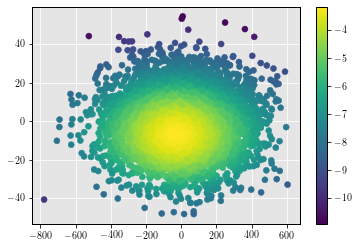

In [26]:
plt.figure(figsize=(6, 4))
plt.scatter(pos[:, 0], pos[:, 1], c=np.log(pot), cmap='viridis')
plt.colorbar()

In [27]:
# number of walkers
N = 16

z = np.random.randn(N)*200
w = np.random.randn(N)*20
dz = 1
pos = np.array([z, w]).T
pos.shape

(16, 2)

In [30]:
nwalkers = pos.shape[0]
ndim = pos.shape[1]

t0 = time()
chain = Model.DM.sample(30_000, nwalkers, pos, theta, dz=1., verbose=True, parallel=True)
print(time() - t0, "s")

65.2552170753479 s


2it [00:00, 42.21it/s]


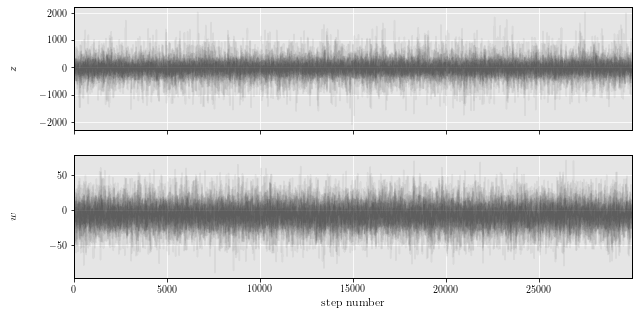

In [31]:
plot_chain(
    chain,
    labels=[r'$z$', r'$w$'],
    figsize=(10, 5),
    alpha=0.05,
) 

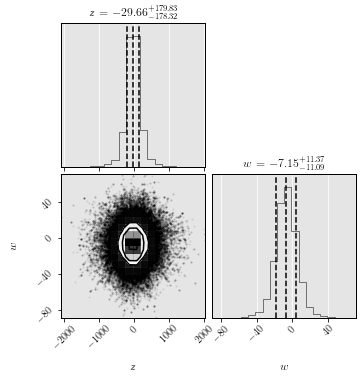

In [32]:
plot_corner(
    params=chain,
    labels=[r'$z$', r'$w$'],
    burn=100,
) 

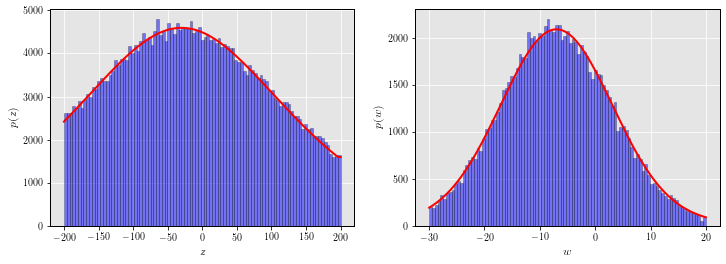

In [34]:
z_sample = chain[:, :, 0].flatten()
w_sample = chain[:, :, 1].flatten()
mask = (z_sample > -50) & (z_sample < 50)
w_sample = w_sample[mask]

z_edge = np.linspace(-200, 200, 100)
dz = z_edge[1] - z_edge[0]
z_mid = (z_edge[:-1] + z_edge[1:])/2
z_num, _ = np.histogram(z_sample, bins=z_edge)
ztot = simps(z_num, z_mid)
zs = np.linspace(z_edge.min(), z_edge.max(), 1000)
fz = Model.DM.fz(zs, theta, dz)
fz = fz * ztot / simps(fz, zs)

w_edge = np.linspace(-30, 20, 100)
dw = w_edge[1] - w_edge[0]
w_mid = (w_edge[:-1] + w_edge[1:])/2
w_num, _ = np.histogram(w_sample, bins=w_edge)
wtot = simps(w_num, w_mid)
ws = np.linspace(w_edge.min(), w_edge.max(), 1000)
fw = Model.DM.fw(ws, theta)
fw = fw * wtot / simps(fw, ws)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(z_mid, z_num, width=dz, color='b', alpha=0.5, ec="k")
axes[0].plot(zs, fz, color='r', lw=2)
axes[0].set_xlabel(r'$z$')
axes[0].set_ylabel(r'$p(z)$')
axes[1].bar(w_mid, w_num, width=dw, color='b', alpha=0.5, ec="k")
axes[1].plot(ws, fw, color='r', lw=2)
axes[1].set_xlabel(r'$w$')
axes[1].set_ylabel(r'$p(w)$')
plt.show()

# different $z$, $N=5000$

figure out the size of the generated data, using gaussian distribution

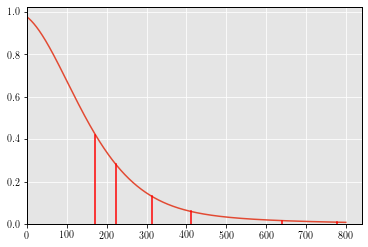

[172. 223. 313. 412. 640. 778.]


In [35]:
dz = 0.1
z = np.arange(0, 800, dz)
fz = Model.DM.fz(z, theta, dz)
cum_fz = np.cumsum(fz)*dz
cum_fz /= cum_fz[-1]
alpha_level = [.7, 0.8, 0.9, 0.95, 0.99, 0.999]
num = len(alpha_level)
zb = np.empty(num)
args = np.empty(num, dtype=int)
for i, alp in enumerate(alpha_level):
    arg_z = np.argmin(np.abs(cum_fz - alp)).astype(int)
    zbi= z[arg_z]
    zb[i] = np.round(zbi)
    args[i] = arg_z

plt.plot(z, fz)
for i in range(num):
    plt.plot([zb[i], zb[i]], [0, fz[args[i]]], 'r')
plt.xlim(0)
plt.ylim(0)
plt.show()
print(zb)

generate...

5000


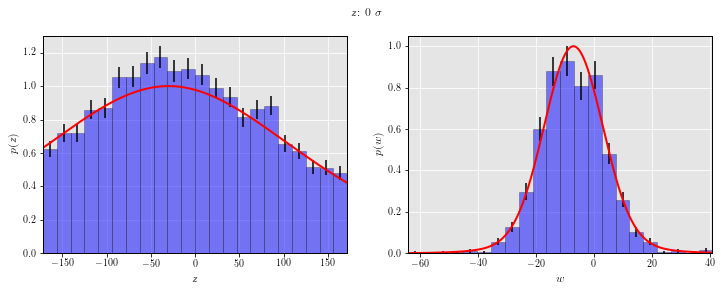

[-164.0924851  -148.46762593 -132.84276676 -117.2179076  -101.59304843
  -85.96818926  -70.3433301   -54.71847093  -39.09361176  -23.46875259
   -7.84389343    7.78096574   23.40582491   39.03068407   54.65554324
   70.28040241   85.90526158  101.53012074  117.15497991  132.77983908
  148.40469824  164.02955741]
export(hdf5) [########################################] 100.00% elapsed time  :     0.08s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_172.hdf5 and w_172.hdf5
5000


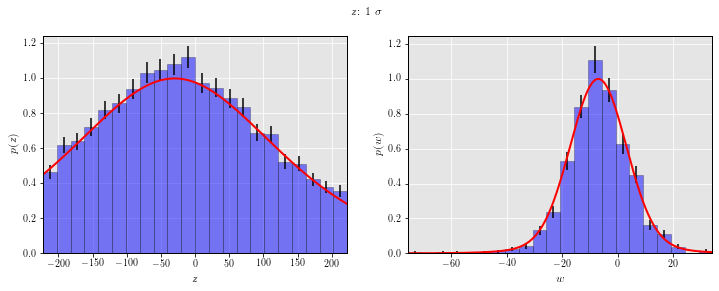

[-212.66346825 -192.41173487 -172.16000149 -151.90826811 -131.65653473
 -111.40480135  -91.15306797  -70.90133458  -50.6496012   -30.39786782
  -10.14613444   10.10559894   30.35733232   50.6090657    70.86079908
   91.11253246  111.36426585  131.61599923  151.86773261  172.11946599
  192.37119937  212.62293275]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_223.hdf5 and w_223.hdf5
5000


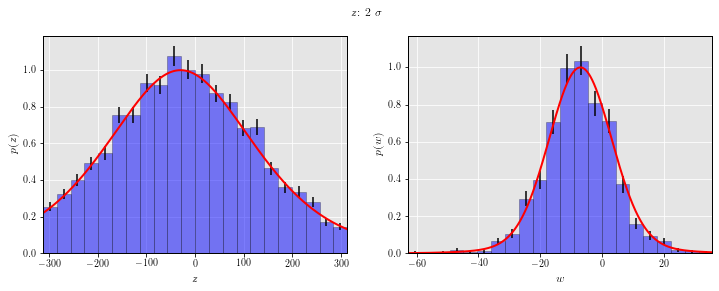

[-298.53675849 -270.11780482 -241.69885114 -213.27989746 -184.86094378
 -156.4419901  -128.02303643  -99.60408275  -71.18512907  -42.76617539
  -14.34722171   14.07173196   42.49068564   70.90963932   99.328593
  127.74754668  156.16650035  184.58545403  213.00440771  241.42336139
  269.84231507  298.26126874]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_313.hdf5 and w_313.hdf5
5000


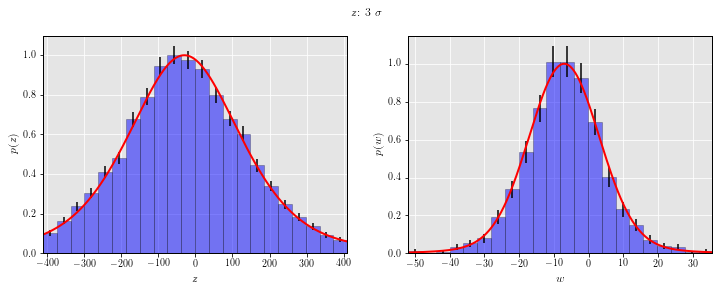

[-393.07333366 -355.73024412 -318.38715457 -281.04406503 -243.70097548
 -206.35788594 -169.01479639 -131.67170685  -94.3286173   -56.98552776
  -19.64243821   17.70065133   55.04374088   92.38683042  129.72991997
  167.07300952  204.41609906  241.75918861  279.10227815  316.4453677
  353.78845724  391.13154679]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_412.hdf5 and w_412.hdf5
5000


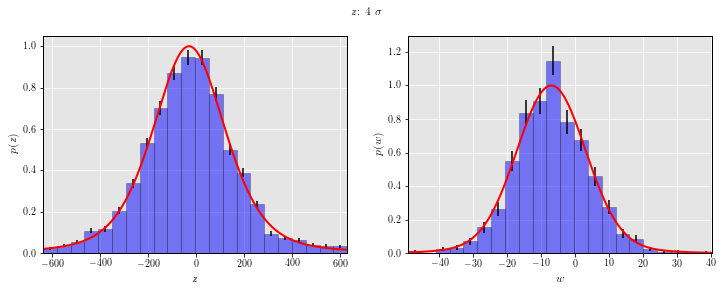

[-610.11709412 -552.48475679 -494.85241945 -437.22008211 -379.58774477
 -321.95540743 -264.32307009 -206.69073275 -149.05839541  -91.42605808
  -33.79372074   23.8386166    81.47095394  139.10329128  196.73562862
  254.36796596  312.00030329  369.63264063  427.26497797  484.89731531
  542.52965265  600.16198999]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_640.hdf5 and w_640.hdf5
5000


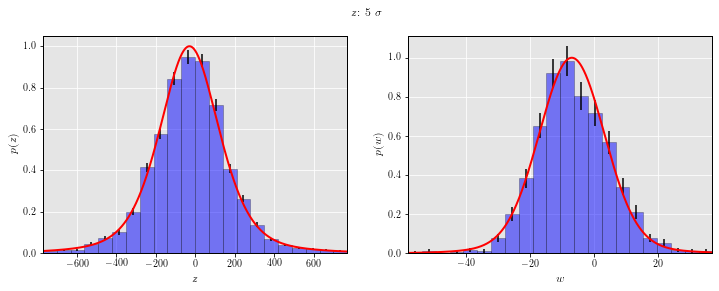

[-738.10760872 -667.95182079 -597.79603285 -527.64024491 -457.48445698
 -387.32866904 -317.1728811  -247.01709316 -176.86130523 -106.70551729
  -36.54972935   33.60605858  103.76184652  173.91763446  244.0734224
  314.22921033  384.38499827  454.54078621  524.69657415  594.85236208
  665.00815002  735.16393796]
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_778.hdf5 and w_778.hdf5


#,mid,num,err
0,-738.107608724047,0.012960484792583351,0.003907733196191464
1,-667.9518207868616,0.014138710682818202,0.004081494209359663
2,-597.7960328496761,0.01767338835352275,0.004563249250949982
3,-527.6402449124906,0.04712903560939401,0.007451754822643335
4,-457.4844569753051,0.07422823108479555,0.009351878081457297
...,...,...,...
17,454.5407862081064,0.040059680267984905,0.00687017848722069
18,524.6965741452918,0.024742743694931853,0.005399309327757931
19,594.8523620824773,0.0188516142437576,0.0047129035609394
20,665.0081500196628,0.01767338835352275,0.004563249250949982


In [37]:
import vaex

Nz = 5000
Nw = 1000
burn = 1000
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
for i, zbi in enumerate(zb):
    mask = np.abs(z) < zbi
    z_sample = z[mask]
    index = np.random.randint(0, len(z_sample), Nz)
    z_sample = z_sample[index]

    znum, zedge = np.histogram(z_sample, bins=22)
    dz = zedge[1]-zedge[0]
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    zerr = np.sqrt(znum)
    max = znum.max()
    znum, zerr = znum/max, zerr/max
    z_tot = znum.sum()*dz
    zdata = (zmid, znum, zerr)
    zs = np.linspace(zedge.min()*1.1, zedge.max()*1.1, 1000)
    fz = Model.DM.fz(zs, theta, zs[1]-zs[0])
    area = simps(fz, zs)
    fz = fz/(area)*z_tot
    max = fz.max()
    fz = fz/max
    znum, zerr = znum/max, zerr/max

    zbound = 50
    mask = np.abs(z) < zbound
    w_sample = w[mask]
    index = np.random.randint(0, len(w_sample), Nw)
    w_sample = w_sample[index]
    wnum, wedge = np.histogram(w_sample, bins=22)
    dw = wedge[1]-wedge[0]
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    w_tot = wnum.sum()*dw
    ws = np.linspace(wedge.min(), wedge.max(), 1000)
    fw = Model.DM.fw(ws, theta)
    area = simps(fw, ws)
    fw = fw/area*w_tot
    max = fw.max()
    fw = fw/max
    wnum, werr = wnum/max, werr/max
    wdata = (wmid, wnum, werr)

    # plot the data
    print(len(z_sample))
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(zmid, znum, yerr=zerr, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[0].plot(zs, fz, color='r', lw=2)
    axes[0].set_xlabel(r'$z$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[0].set_xlim(zedge.min(), zedge.max())
    axes[1].bar(wmid, wnum, yerr=werr, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[1].plot(ws, fw, color='r', lw=2)
    axes[1].set_xlabel(r'$w$')
    axes[1].set_ylabel(r'$p(w)$')
    axes[1].set_xlim(wedge.min(), wedge.max())
    fig.suptitle(r'$z$: {} $\sigma$'.format(i))
    plt.show()
    df_z = vaex.from_arrays(mid=zmid, num=znum, err=zerr)
    df_w = vaex.from_arrays(mid=wmid, num=wnum, err=werr)
    print(zmid)
    df_z.export(join(root_dir, 'Data', 'MCMC-no', 'mock', 'data', 'z', f'z_{int(zbi)}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC-no', 'mock', 'data' ,'z', f'w_{int(zbi)}.hdf5'), progress=True)
    print(f"saved z_{int(zbi)}.hdf5 and w_{int(zbi)}.hdf5")
df_z

# different $N$, $z=z_b$

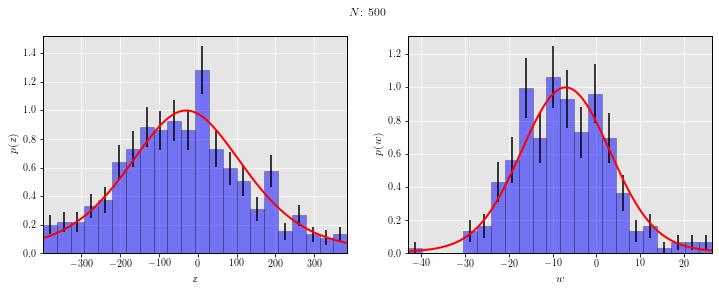

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_00500.hdf5 and w_00500.hdf5


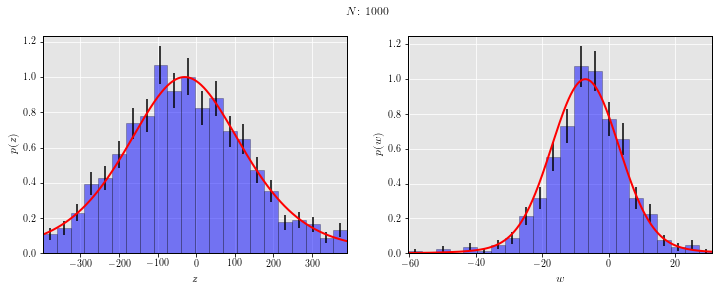

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_01000.hdf5 and w_01000.hdf5


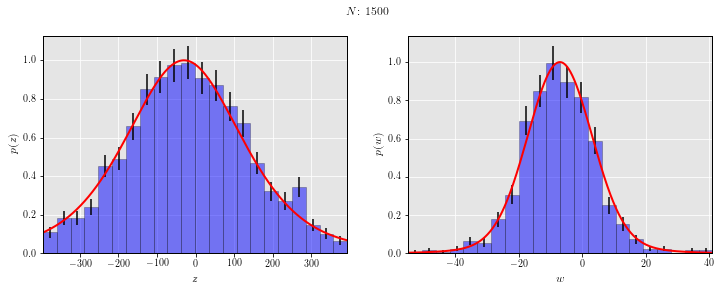

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_01500.hdf5 and w_01500.hdf5


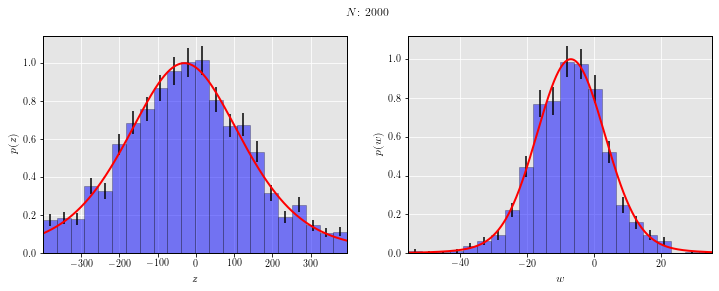

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_02000.hdf5 and w_02000.hdf5


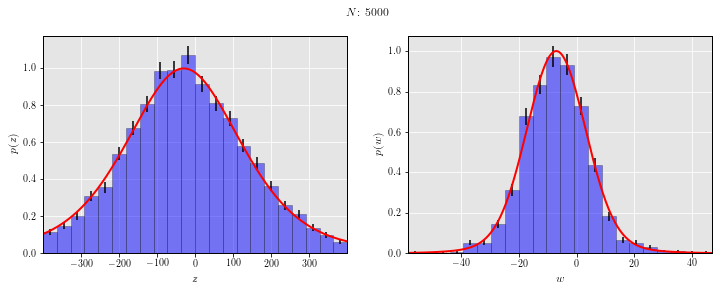

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_05000.hdf5 and w_05000.hdf5


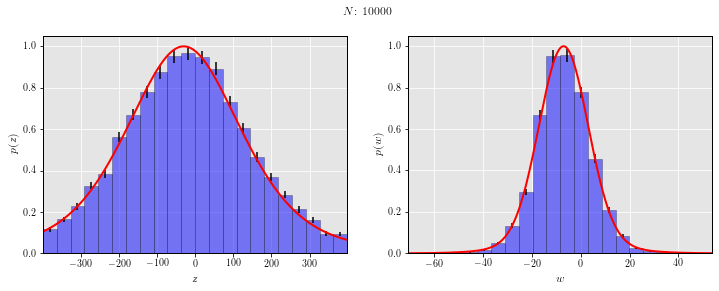

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_10000.hdf5 and w_10000.hdf5


In [39]:
import vaex

zb = 400

burn = 1000
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
mask = np.abs(z) < zb
z_s = z[mask]
w_s = w[mask]
# for Nz in [500, 1000, 5000, 10_000, 50_000, 100_000]:
for Nz, Nw in [(500, 250), (1000, 500), (1500, 750), (2000, 1000), (5000, 2000), (10_000, 5000)]:
    index = np.random.randint(0, len(z_s), Nz)
    z_sample = z_s[index]
    znum, zedge = np.histogram(z_sample, bins=22)
    dz = zedge[1]-zedge[0]
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    zerr = np.sqrt(znum)
    max = znum.max()
    znum, zerr = znum/max, zerr/max
    z_tot = znum.sum()*dz
    zdata = (zmid, znum, zerr)
    zs = np.linspace(zedge.min()*1.1, zedge.max()*1.1, 1000)
    fz = Model.DM.fz(zs, theta,  zs[1]-zs[0])
    area = simps(fz, zs)
    fz = fz/(area)*z_tot
    max = fz.max()
    fz = fz/max
    znum, zerr = znum/max, zerr/max

    zbound = 50
    mask = np.abs(z_s) < zbound
    w_sample = w_s[mask]
    index = np.random.randint(0, len(w_sample), Nw)
    w_sample = w_sample[index]
    wnum, wedge = np.histogram(w_sample, bins=22)
    dw = wedge[1]-wedge[0]
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    w_tot = wnum.sum()*dw
    ws = np.linspace(wedge.min(), wedge.max(), 1000)
    fw = Model.DM.fw(ws, theta)
    area = simps(fw, ws)
    fw = fw/area*w_tot
    max = fw.max()
    fw = fw/max
    wnum, werr = wnum/max, werr/max
    wdata = (wmid, wnum, werr)

    # plot the data
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(zmid, znum, yerr=zerr, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[0].plot(zs, fz, color='r', lw=2)
    axes[0].set_xlabel(r'$z$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[0].set_xlim(zedge.min(), zedge.max())
    axes[1].bar(wmid, wnum, yerr=werr, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[1].plot(ws, fw, color='r', lw=2)
    axes[1].set_xlabel(r'$w$')
    axes[1].set_ylabel(r'$p(w)$')
    axes[1].set_xlim(wedge.min(), wedge.max())
    fig.suptitle(r'$N$: {}'.format(Nz))
    plt.show()
    df_z = vaex.from_arrays(mid=zmid, num=znum, err=zerr)
    df_w = vaex.from_arrays(mid=wmid, num=wnum, err=werr)
    df_z.export(join(root_dir, 'Data', 'MCMC-no', 'mock','data', 'n', f'z_{Nz:05d}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC-no', 'mock','data' ,'n', f'w_{Nz:05d}.hdf5'), progress=True)
    print(f"saved z_{Nz:05d}.hdf5 and w_{Nz:05d}.hdf5")
    

# for comparison model

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from os.path import join, abspath
from hammer import Model
from scipy.integrate import simps
root_dir = abspath(join('..', '..'))
root_data_dir = join(root_dir, "Data")
import sys
sys.path.append(root_dir)
import vaex
from scipy.stats import norm
from utils import style, concat

In [3]:
style()

In [4]:
name = "Baryon"
baryon_dir = join(root_data_dir, name)
# load baryons components
df_baryon = vaex.open(join(baryon_dir, "baryon.hdf5"))
df_baryon

#,components,rho,e_rho,sigma_z,e_sigma_z
0,Molecular gas (H2),0.0104,0.00312,3.7,0.2
1,Cold atomic gas (HI(1)),0.0277,0.00554,7.1,0.5
2,Warm atomic gas (HI(2)),0.0073,0.0007,22.1,2.4
3,Hot ionized gas (HII),0.0005,3e-05,39.0,4.0
4,Giant stars,0.0006,6e-05,15.5,1.6
...,...,...,...,...,...
7,4 < MV < 5,0.0029,0.00029,18.0,1.8
8,5 < MV < 8,0.0072,0.00072,18.5,1.9
9,MV > 8,0.0216,0.0028,18.5,4.0
10,White dwarfs,0.0056,0.001,20.0,5.0


In [6]:
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
rhob = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
rhoDM = 0.016
log_nu0 = 0
R = 3.4E-3
zsun = 30
w0 = -7
sigmaw1 = 10
sigmaw2 = 20
log_sigmaw = np.log(sigmaw1)
q_sigmaw = sigmaw1/sigmaw2
a1 = 1
a2 = 0.1
atot = a1 + a2
a1 = a1/atot
a2 = a2/atot
log_a = np.log(a1)
q_a = a2/a1
log_phi_b = 5

theta = concat(rhob, sigmaz, rhoDM, log_nu0, R, zsun, w0, log_sigmaw, q_sigmaw, log_a, q_a, log_phi_b)

phi_b = Model.DM.potential(np.array([50.+zsun]), theta, 0.5)
log_phi_b = np.log(phi_b)
theta = concat(rhob, sigmaz, rhoDM, log_nu0, R, zsun, w0, log_sigmaw, q_sigmaw, log_a, q_a, log_phi_b)
theta.shape, log_phi_b

((34,), array([3.43834171]))

In [7]:
chain = np.load(join(root_dir, 'Data', 'MCMC-no', 'mock', 'data', 'mock', 'chain.npy'))
chain.shape

(1000000, 16, 2)

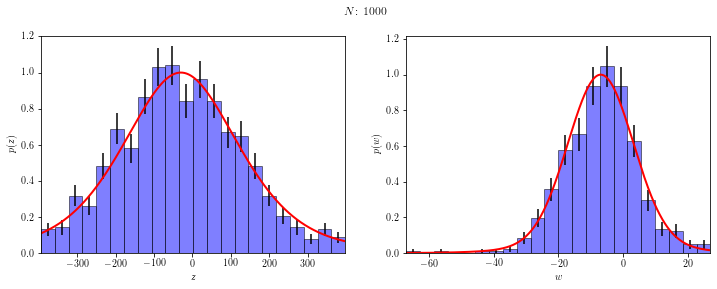

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_0001000.hdf5 and w_0001000.hdf5


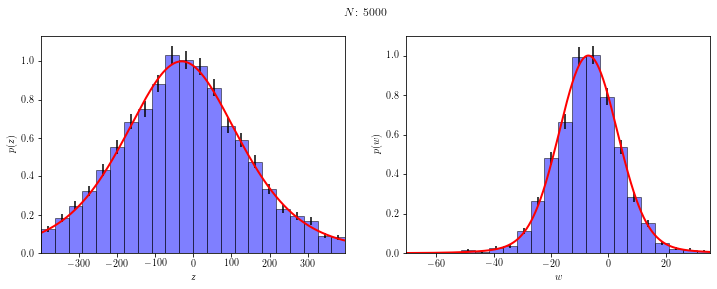

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 saved z_0005000.hdf5 and w_0005000.hdf5


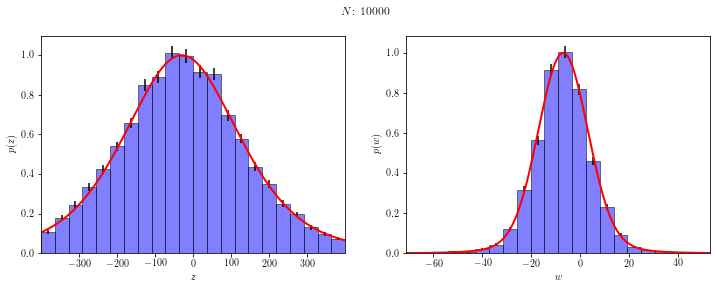

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_0010000.hdf5 and w_0010000.hdf5


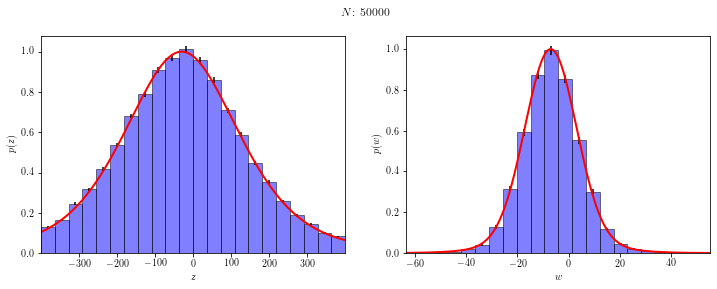

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_0050000.hdf5 and w_0050000.hdf5


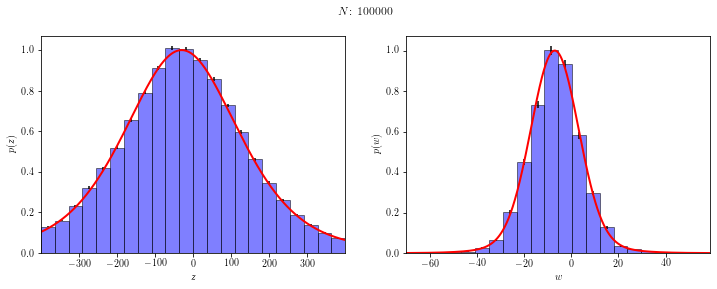

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_0100000.hdf5 and w_0100000.hdf5


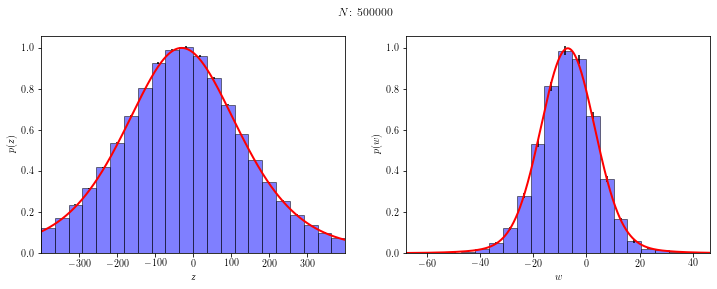

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_0500000.hdf5 and w_0500000.hdf5


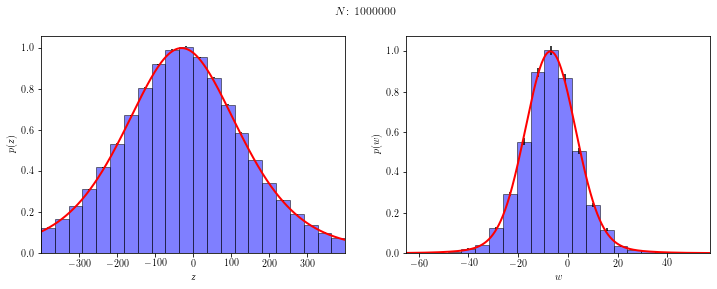

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_1000000.hdf5 and w_1000000.hdf5


In [10]:
import vaex

zb = 400.

burn = 1000
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
mask = np.abs(z) < zb
z_s = z[mask]
w_s = w[mask]
for Nz, Nw in [(1000, 500), (5000, 2500), (10_000, 5000), (50_000, 10_000), (100_000, 10_000), (500_000, 10_000), (1_000_000, 10_000)]:
    index = np.random.randint(0, len(z_s), Nz)
    z_sample = z_s[index]
    znum, zedge = np.histogram(z_sample, bins=22)
    dz = zedge[1]-zedge[0]
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    zerr = np.sqrt(znum)
    max = znum.max()
    znum, zerr = znum/max, zerr/max
    z_tot = znum.sum()*dz
    zdata = (zmid, znum, zerr)
    zs = np.linspace(zedge.min()*1.1, zedge.max()*1.1, 1000)
    fz = Model.DM.fz(zs, theta, zs[1]-zs[0])
    area = simps(fz, zs)
    fz = fz/(area)*z_tot
    max = fz.max()
    fz = fz/max
    znum, zerr = znum/max, zerr/max

    zbound = 50
    mask = np.abs(z_s) < zbound
    w_sample = w_s[mask]
    index = np.random.randint(0, len(w_sample), Nw)
    w_sample = w_sample[index]
    wnum, wedge = np.histogram(w_sample, bins=22)
    dw = wedge[1]-wedge[0]
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    w_tot = wnum.sum()*dw
    ws = np.linspace(wedge.min(), wedge.max(), 1000)
    fw = Model.DM.fw(ws, theta)
    area = simps(fw, ws)
    fw = fw/area*w_tot
    max = fw.max()
    fw = fw/max
    wnum, werr = wnum/max, werr/max
    wdata = (wmid, wnum, werr)

    # plot the data
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(zmid, znum, yerr=zerr, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[0].plot(zs, fz, color='r', lw=2)
    axes[0].set_xlabel(r'$z$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[0].set_xlim(zedge.min(), zedge.max())
    axes[1].bar(wmid, wnum, yerr=werr, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[1].plot(ws, fw, color='r', lw=2)
    axes[1].set_xlabel(r'$w$')
    axes[1].set_ylabel(r'$p(w)$')
    axes[1].set_xlim(wedge.min(), wedge.max())
    fig.suptitle(r'$N$: {}'.format(Nz))
    plt.show()
    df_z = vaex.from_arrays(mid=zmid, num=znum, err=zerr)
    df_w = vaex.from_arrays(mid=wmid, num=wnum, err=werr)
    df_z.export(join(root_dir, 'Data', 'MCMC-no', 'mock','data', 'mock', f'z_{Nz:07d}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC-no', 'mock','data' ,'mock', f'w_{Nz:07d}.hdf5'), progress=True)
    print(f"saved z_{Nz:07d}.hdf5 and w_{Nz:07d}.hdf5")
    # break